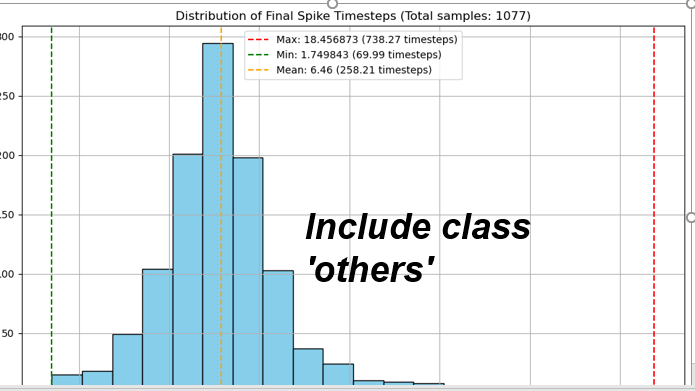

위 분포랑 완전히 같을 필요는 없지 밑은 duration이고 위는 last spike의 timestamp니까 좀 다를 수도 ㅇㅇ

밑의 합산하기 이거는 진짜 아닌듯
위 그림이랑 다르잖아


클래스별 duration 합의 통계 (초 단위):
평균: 7.058512 seconds
최대: 25.105089 seconds
최소: 1.750000 seconds


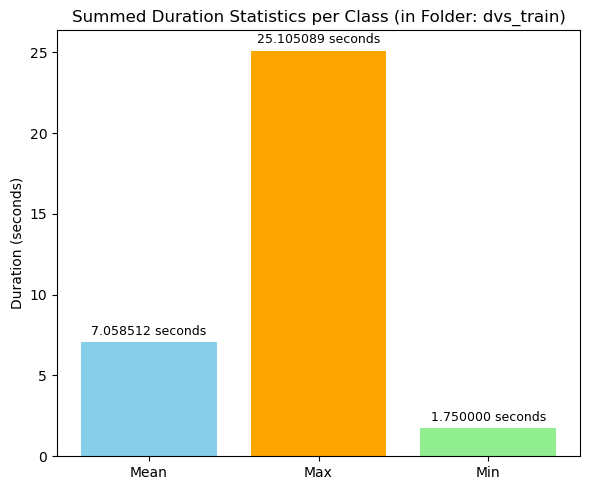

In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# dvs_train 폴더 경로
folder_path = 'dvs_train'

# 폴더 내 모든 .csv 파일 가져오기
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

expected_classes = set(range(1, 12))  # 클래스 1부터 11까지

# 각 파일에서 클래스별 duration 합계를 담을 리스트
total_class_durations = []

for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)

    # duration 계산 (끝시간 - 시작시간)
    df['duration'] = df.iloc[:, 2] - df.iloc[:, 1]

    # 클래스별로 duration 합계 계산
    for cls in expected_classes:
        cls_rows = df[df['class'] == cls]
        if not cls_rows.empty:
            class_sum = cls_rows['duration'].sum()
            total_class_durations.append(class_sum)

# 전체 클래스 duration 합계 리스트 → 초 단위로 변환
total_class_durations = np.array(total_class_durations) * 1e-6  # usec → sec

# 통계 계산
mean_duration = np.mean(total_class_durations)
max_duration = np.max(total_class_durations)
min_duration = np.min(total_class_durations)

# 결과 출력
print(f"클래스별 duration 합의 통계 (초 단위):")
print(f"평균: {mean_duration:.6f} seconds")
print(f"최대: {max_duration:.6f} seconds")
print(f"최소: {min_duration:.6f} seconds")

# 그래프 그리기
labels = ['Mean', 'Max', 'Min']
values = [mean_duration, max_duration, min_duration]

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=['skyblue', 'orange', 'lightgreen'])

plt.ylabel('Duration (seconds)')
plt.title(f'Summed Duration Statistics per Class (in Folder: {folder_path})')

# 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.6f} seconds',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


걍 다 넣기
이거 분포는 비슷한데 상식적이지못함. tonic 1077개잖아

전체 duration 통계 (초 단위):
평균: 6.464300 seconds
최대: 18.456951 seconds
최소: 1.750000 seconds


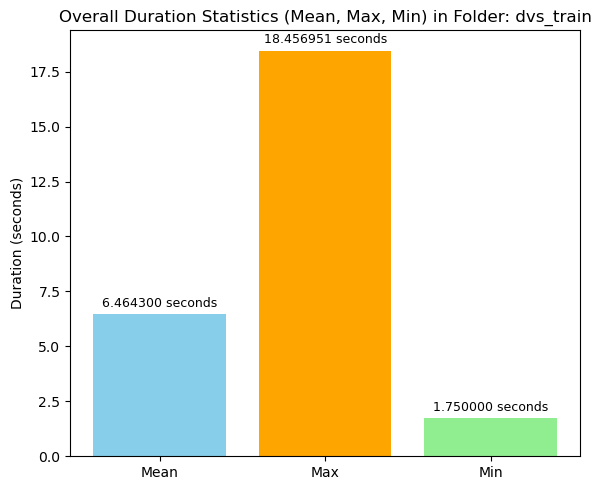

In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# dvs_train 폴더 경로
folder_path = 'dvs_train'

# 폴더 내 모든 .csv 파일 가져오기
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 모든 duration 저장할 리스트
all_durations = []

for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)

    # duration 계산 (끝시간 - 시작시간)
    df['duration'] = df.iloc[:, 2] - df.iloc[:, 1]

    # 모든 duration을 리스트에 추가
    all_durations.extend(df['duration'].tolist())

# 전체 duration에 대해 통계 계산
all_durations = np.array(all_durations)
mean_duration = np.mean(all_durations) * 1e-6  # usec -> sec
max_duration = np.max(all_durations) * 1e-6
min_duration = np.min(all_durations) * 1e-6

# 결과 출력
print(f"전체 duration 통계 (초 단위):")
print(f"평균: {mean_duration:.6f} seconds")
print(f"최대: {max_duration:.6f} seconds")
print(f"최소: {min_duration:.6f} seconds")

# 그래프 그리기
labels = ['Mean', 'Max', 'Min']
values = [mean_duration, max_duration, min_duration]

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=['skyblue', 'orange', 'lightgreen'])

plt.ylabel('Duration (seconds)')
plt.title(f'Overall Duration Statistics (Mean, Max, Min) in Folder: {folder_path}')

# 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.6f} seconds',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


위의 것만

전체 첫 번째 duration 통계 (초 단위):
평균: 6.451183 s
최대: 18.456951 s
최소: 1.750000 s


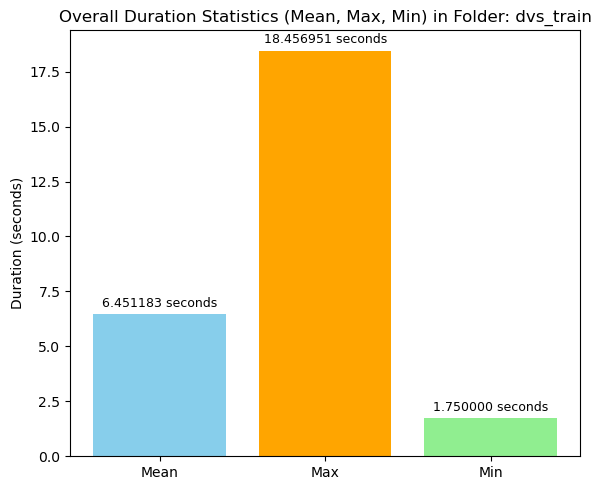

In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# dvs_train 폴더 경로
folder_path = 'dvs_train'

# 폴더 내 모든 .csv 파일 가져오기
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

expected_classes = set(range(1, 12))  # 1부터 11까지 클래스 집합

# 모든 첫 번째 duration 저장할 리스트
all_first_durations = []

for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)

    # duration 계산 (끝시간 - 시작시간)
    df['duration'] = df.iloc[:, 2] - df.iloc[:, 1]

    for cls in expected_classes:
        cls_rows = df[df['class'] == cls]
        if not cls_rows.empty:
            first_duration = cls_rows.iloc[0]['duration']
            all_first_durations.append(first_duration)

# 전체 데이터에 대해 통계 계산
all_first_durations = np.array(all_first_durations)
mean_duration = np.mean(all_first_durations) * 1e-6  # usec -> sec
max_duration = np.max(all_first_durations) * 1e-6
min_duration = np.min(all_first_durations) * 1e-6

# 결과 출력
print(f"전체 첫 번째 duration 통계 (초 단위):")
print(f"평균: {mean_duration:.6f} s")
print(f"최대: {max_duration:.6f} s")
print(f"최소: {min_duration:.6f} s")

# 그래프 그리기
labels = ['Mean', 'Max', 'Min']
values = [mean_duration, max_duration, min_duration]

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=['skyblue', 'orange', 'lightgreen'])

plt.ylabel('Duration (seconds)')
plt.title(f'Overall Duration Statistics (Mean, Max, Min) in Folder: {folder_path}')

# 막대 위에 값 표시 (소수점 6자리)
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.6f} seconds',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

밑의 것만

전체 첫 번째 duration 통계 (초 단위):
평균: 6.443145 s
최대: 18.456951 s
최소: 1.750000 s


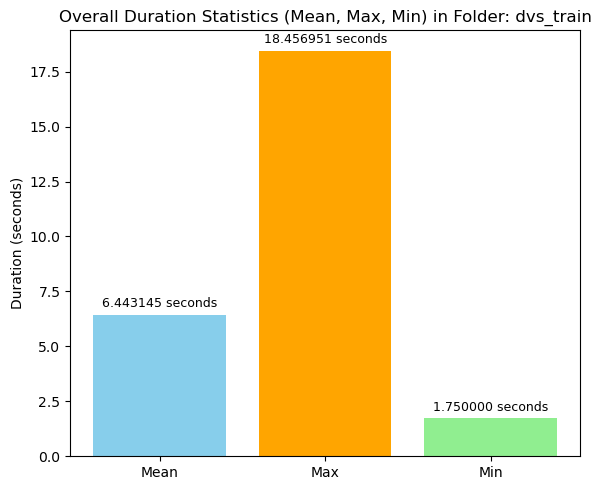

In [42]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# dvs_train 폴더 경로
folder_path = 'dvs_train'

# 폴더 내 모든 .csv 파일 가져오기
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

expected_classes = set(range(1, 12))  # 1부터 11까지 클래스 집합

# 모든 첫 번째 duration 저장할 리스트
all_first_durations = []

for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)

    # duration 계산 (끝시간 - 시작시간)
    df['duration'] = df.iloc[:, 2] - df.iloc[:, 1]

    for cls in expected_classes:
        cls_rows = df[df['class'] == cls]
        if not cls_rows.empty:
            first_duration = cls_rows.iloc[-1]['duration']
            all_first_durations.append(first_duration)

# 전체 데이터에 대해 통계 계산
all_first_durations = np.array(all_first_durations)
mean_duration = np.mean(all_first_durations) * 1e-6  # usec -> sec
max_duration = np.max(all_first_durations) * 1e-6
min_duration = np.min(all_first_durations) * 1e-6

# 결과 출력
print(f"전체 첫 번째 duration 통계 (초 단위):")
print(f"평균: {mean_duration:.6f} s")
print(f"최대: {max_duration:.6f} s")
print(f"최소: {min_duration:.6f} s")

# 그래프 그리기
labels = ['Mean', 'Max', 'Min']
values = [mean_duration, max_duration, min_duration]

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=['skyblue', 'orange', 'lightgreen'])

plt.ylabel('Duration (seconds)')
plt.title(f'Overall Duration Statistics (Mean, Max, Min) in Folder: {folder_path}')

# 막대 위에 값 표시 (소수점 6자리)
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.6f} seconds',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

같은 클래스가 두 번 이상 등장한 파일 및 클래스:

- 파일: user23_led_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user23_lab_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user23_fluorescent_led_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user23_fluorescent_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user22_natural_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user22_led_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user22_lab_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user22_fluorescent_led_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user22_fluorescent_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user21_natural_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user21_lab_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user21_fluorescent_led_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user21_fluorescent_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user20_led_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user20_fluorescent_led_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user20_fluorescent_labels.csv, 클래스 8 등장 횟수: 2


- 파일: user19_natural_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user19_led_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user19_lab_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user19_fluorescent_led_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user19_fluorescent_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user18_led_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user18_lab_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user18_fluorescent_led_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user18_fluorescent_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user17_natural_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user17_led_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user17_lab_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user17_fluorescent_led_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user17_fluorescent_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user16_natural_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user16_led_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user16_lab_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user16_fluorescent_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user15_natural_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user15_led_labels.csv, 클래스 8 등장 횟수: 2
- 파일: user15_lab_labels.csv, 클래스 8 등

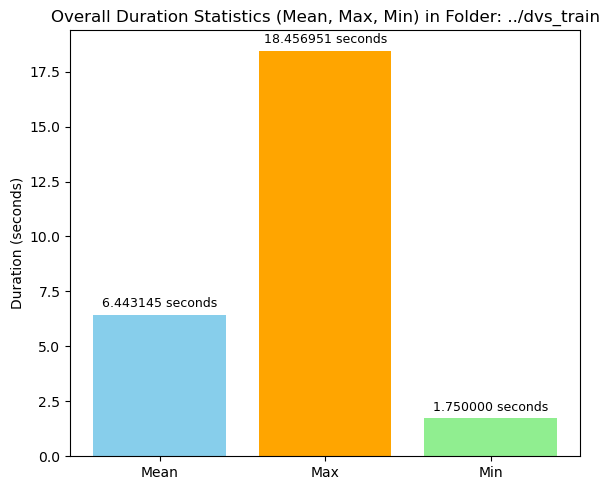

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# dvs_train 폴더 경로
folder_path = '../dvs_train'

# 폴더 내 모든 .csv 파일 가져오기
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

expected_classes = set(range(1, 12))  # 1부터 11까지 클래스 집합

# 모든 마지막 duration 저장할 리스트
all_last_durations = []

print("같은 클래스가 두 번 이상 등장한 파일 및 클래스:\n")

for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)

    # duration 계산 (끝시간 - 시작시간)
    df['duration'] = df.iloc[:, 2] - df.iloc[:, 1]

    for cls in expected_classes:
        cls_rows = df[df['class'] == cls]
        if len(cls_rows) > 1:
            print(f"- 파일: {file_name}, 클래스 {cls} 등장 횟수: {len(cls_rows)}")

        if not cls_rows.empty:
            last_duration = cls_rows.iloc[-1]['duration']
            all_last_durations.append(last_duration)

# 전체 데이터에 대해 통계 계산
all_last_durations = np.array(all_last_durations)
mean_duration = np.mean(all_last_durations) * 1e-6  # usec -> sec
max_duration = np.max(all_last_durations) * 1e-6
min_duration = np.min(all_last_durations) * 1e-6

# 결과 출력
print(f"\n전체 마지막 duration 통계 (초 단위):")
print(f"평균: {mean_duration:.6f} s")
print(f"최대: {max_duration:.6f} s")
print(f"최소: {min_duration:.6f} s")

# 그래프 그리기
labels = ['Mean', 'Max', 'Min']
values = [mean_duration, max_duration, min_duration]

